# Pre-Processing
- Adjust for skewed data: standardize
- Impute Missing data
- Can be passed into the train() function to standardize all Predictors

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



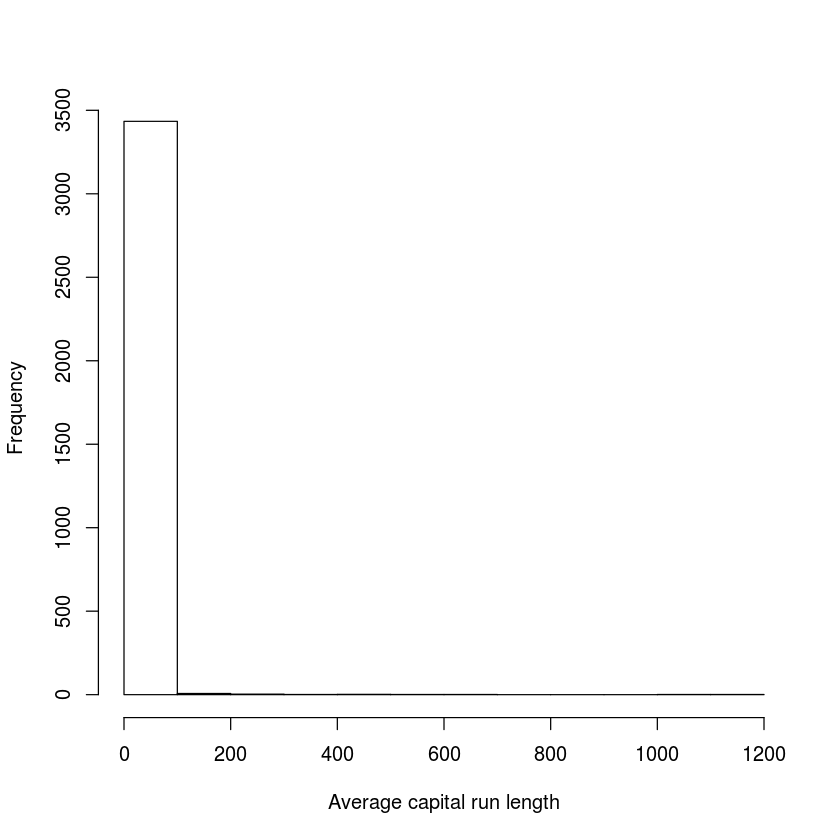

In [1]:
library(caret)
library(kernlab) #spam dataset
data(spam)

# Split based on type
inTrain <- createDataPartition(y = spam$type, p = 0.75, list = FALSE)
training <- spam[inTrain,]
testing <- spam[-inTrain,]

# Look at capitalAve Variable: skewed (too many small run lengths, with few large ones)
hist(training$capitalAve, main = "", xlab = "Average capital run length")

## Preprocess Manually
- Small Mean and Large SD

In [6]:
paste("mean:", mean(training$capitalAve))
paste("sd:", sd(training$capitalAve))

[1] "mean: 5.24709852216749"

[1] "sd: 33.7048255345828"

In [44]:
# Standardize Training set
# Mean will be 0, Sd will be 1
trainCapAveStd <- (training$capitalAve - mean(training$capitalAve)) / sd(training$capitalAve)
paste("mean:", mean(trainCapAveStd))
paste("sd:", sd(trainCapAveStd))

[1] "mean: 8.7359487942628e-18"

[1] "sd: 1"

## When Applying to the Test Dataset, apply parameters used for Training set
- Mean won't be exactly 0, and SD won't be exactly 1

In [17]:
# Standardize Testing set
testCapAveStd <- (testing$capitalAve - mean(training$capitalAve)) / sd(training$capitalAve)
paste("mean:", mean(testCapAveStd))
paste("sd:", sd(testCapAveStd))

[1] "mean: -0.00659792765282769"

[1] "sd: 0.73845524454729"

<hr>

## Use preProcess() function to Standardize
- Pass all Variable except for the last (type)
- Create preProcess Object
- Use that Object to predict
- Use that Object to predict on Testing set as well

In [39]:
preObj <- preProcess(training[, -58], method = c("center", "scale"))
preObj

Created from 3451 samples and 57 variables

Pre-processing:
  - centered (57)
  - ignored (0)
  - scaled (57)


In [40]:
trainCapAveStd <- predict(preObj, training[, -58])$capitalAve
head(trainCapAveStd)

[1] -0.044239912 -0.003948946 -0.050737498 -0.066669935 -0.106100491
[6]  0.133420108

In [45]:
paste("mean:", mean(trainCapAveStd))
paste("sd:", sd(trainCapAveStd))

[1] "mean: 8.7359487942628e-18"

[1] "sd: 1"

## Standardize the Testing Set

In [46]:
testCapAveStd <- predict(preObj, testing[, -58])$capitalAve
head(testCapAveStd)

paste("mean:", mean(testCapAveStd))
paste("sd:", sd(testCapAveStd))

[1]  0.13570465 -0.05073750 -0.08298807  0.01222085 -0.01765618  0.89642658

[1] "mean: -0.00659792765282769"

[1] "sd: 0.73845524454729"

## Look at Standardize distribution

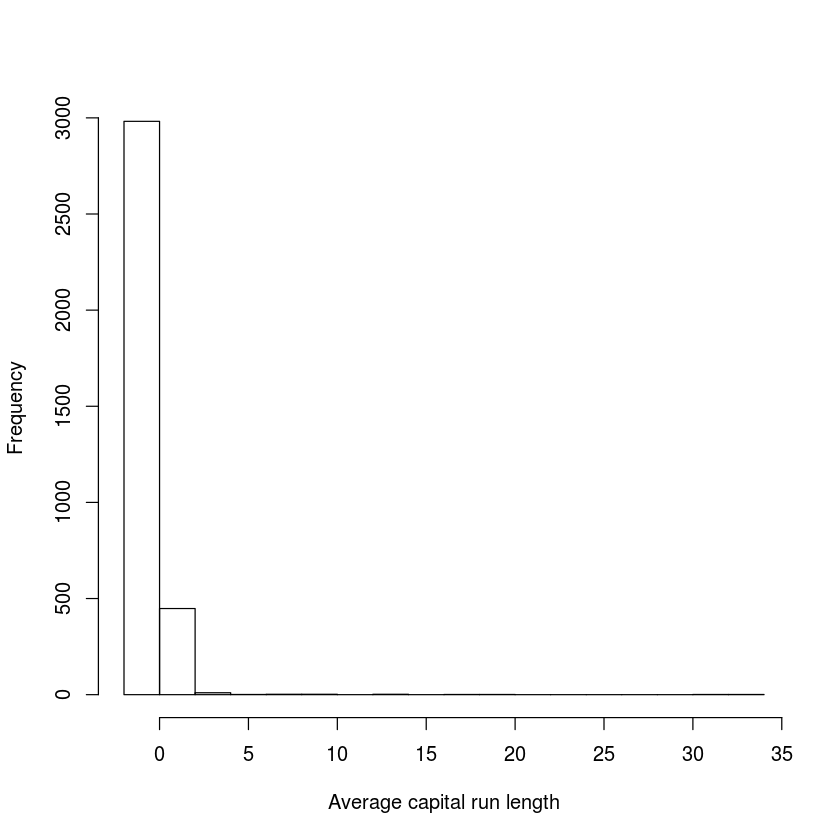

In [47]:
hist(trainCapAveStd, main = "", xlab = "Average capital run length")